# Main differences with rpnpy
## Getting the file information (without data fstprm, with data fstluk)
### Rpnpy - metadata is in a list(dict)

In [2]:
# put this at the beginning of a vscode notebook
import os
import sys
import pathlib
# make rpnpy visible
os.environ['LD_LIBRARY_PATH'] = '/fs/ssm/eccc/mrd/rpn/libs/19.6.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199:/fs/ssm/eccc/mrd/rpn/vgrid/6.5.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199:/fs/ssm/eccc/mrd/rpn/utils/19.6.0/ubuntu-18.04-skylake-64/lib:/fs/ssm/eccc/mrd/rpn/utils/19.6.0/ubuntu-18.04-amd64-64/lib:/fs/ssm/hpco/exp/openmpi/hpcx-core-2.4.0/hpcx-core_2.4.0-gcc-mofed-4.6-1_ubuntu-18.04-amd64-64/x/ucx/lib:/fs/ssm/hpco/exp/openmpi/hpcx-core-2.4.0/hpcx-core_2.4.0-gcc-mofed-4.6-1_ubuntu-18.04-amd64-64/x/sharp/lib:/fs/ssm/hpco/exp/openmpi/hpcx-core-2.4.0/hpcx-core_2.4.0-gcc-mofed-4.6-1_ubuntu-18.04-amd64-64/x/hcoll/lib:/fs/ssm/hpco/exp/openmpi/openmpi-3.1.2--hpcx-2.4.0-mofed-4.6--intel-19.0.3.199/ubuntu-18.04-amd64-64/lib:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/compiler/lib/intel64_lin:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/ipp/lib/intel64:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/mkl/lib/intel64_lin:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/tbb/lib/intel64/gcc4.7:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/debugger_2019/libipt/intel64/lib:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/daal/lib/intel64_lin:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/daal/../tbb/lib/intel64_lin/gcc4.4:/opt/mellanox/mxm/lib'
sys.path.append('/fs/ssm/eccc/mrd/rpn/MIG/ENV/d/rpnpy/rpnpy_2.1.2/rpnpy_2.1.2_all/lib')
sys.path.append('/fs/ssm/eccc/mrd/rpn/libs/19.6.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199')
sys.path.append('/fs/ssm/eccc/mrd/rpn/vgrid/6.5.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199')
sys.path.append('/fs/ssm/eccc/cmd/cmda/libs/19.6.0/intel-19.0.3.199/ubuntu-18.04-skylake-64/lib')
sys.path.append('/fs/ssm/eccc/mrd/rpn/utils/19.6.0/env-python_1.3.0_all/share/Python/PythonAllRevs')
# make ci_fstcomp visible
sys.path.append('/fs/ssm/eccc/cmd/cmds/apps/ci_fstcomp/1.0.3/all/lib/python')
sys.path.append('/home/zak000/src/fstpy')

In [9]:
import rpnpy.librmn.all as rmn
unit = rmn.fstopenall('/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std')
keys = rmn.fstinl(unit)
records = [rmn.fstprm(k) for k in keys]
rmn.fstcloseall(unit)
for rec in records[0:1]:
    print(rec,end='')

{'key': 1, 'shape': (1108, 1082, 1), 'dateo': 442998800, 'datev': 443004200, 'deet': 300, 'npas': 72, 'ni': 1108, 'nj': 1082, 'nk': 1, 'nbits': 16, 'datyp': 134, 'ip1': 95529009, 'ip2': 6, 'ip3': 0, 'typvar': 'P ', 'nomvar': 'HU  ', 'etiket': 'R1_V710_N   ', 'grtyp': 'Z', 'ig1': 33792, 'ig2': 77761, 'ig3': 1, 'ig4': 0, 'swa': 2335, 'lng': 216286, 'dltf': 0, 'ubc': 0, 'xtra1': 443004200, 'xtra2': 0, 'xtra3': 0}

## Getting the file information (with data as dask lazy arrays, decoded attributes)
### Fstpy - data is in a dataframe

In [3]:
import fstpy.all as fstpy
# setup your file to read
df = fstpy.StandardFileReader('/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std', decode_metadata=True).to_pandas()
df[['nomvar', 'typvar', 'etiket', 'ni', 'nj', 'nk', 'dateo', 'ip1', 'ip2', 'ip3', 'deet', 'npas', 'datyp', 'nbits', 'grtyp', 'ig1', 'ig2', 'ig3', 'ig4', 'datev', 'grid']]

#key – Positioning information to the record. Obtained with fstinf or fstinl.
#dateo – date of origin (date time stamp) Cannot change dateo and datev.
#datev – date of validity (date time stamp) Cannot change dateo and datev.
#deet – Length of a time step in seconds datev constant unless keep_dateo
#npas – time step number datev constant unless keep_dateo
#ni – first dimension of the data field
#nj – second dimension of the data field
#nk – third dimension of the data field
#nbits – number of bits kept for the elements of the field
#datyp – data type of the elements
#ip1 – vertical level
#ip2 – forecast hour
#ip3 – user defined identifier
#typvar – type of field (forecast, analysis, climatology)
#nomvar – variable name
#etiket – label
#grtyp – type of geographical projection
#ig1 – first grid descriptor
#ig2 – second grid descriptor
#ig3 – third grid descriptor
#ig4 – fourth grid descriptor/
#keep_dateo (bool) – By default datev is kept constant unless dateo is specified or keep_dateo=True (keep_dateo must be False is datev is provided).
#verion 2.0.rc1, this function can be called with a rec meta (From) –
#keylist instead of a simple key number (or) –
#rec (dict) – dictionary where key = rec[‘key’]
#keylist (list) – list of keys for records to edit

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,PN,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
1,P0,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,QC,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,TD,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
4,ES,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,QQ,P,R1_V710_N,1107,1081,1,442998800,96015143,6,0,...,72,134,12,Z,50460,53326,4,0,443004200,5046053326
1870,QQ,P,R1_V710_N,1107,1081,1,442998800,95286806,6,0,...,72,134,12,Z,50460,53326,4,0,443004200,5046053326
1871,QQ,P,R1_V710_N,1107,1081,1,442998800,95270482,6,0,...,72,134,12,Z,50460,53326,4,0,443004200,5046053326
1872,>>,X,R1_V710_N,1107,1,1,442998800,50460,53326,4,...,0,5,32,E,1470,560,54400,46560,442998800,5046053326


### Already decoded attributes

In [ ]:
# df = data frame for storing data tables and list of vectors of equal length
# Question: Comment ca crée 3 differentes colonnes pour la colonne etiket
# Question: Comment certaines colonnes sont decoder ou ont apparu (date_of_observation, date_of_validity,level etc...)?

df[['nomvar', 'typvar', 'run', 'label', 'implementation', 'ni', 'nj', 'nk', 'date_of_observation', 'date_of_validity', 'level', 'ip1_pkind', 'data_type_str', 'nbits', 'unit', 'description', 'vctype']]

## Writing to file
### Rpnpy

In [10]:
import rpnpy.librmn.all as rmn
from os import getenv

# setup our output file

# returns the value of the environment variable key if it exists otherwise returns the default value.
# Get the value of 'USER'
key = "USER"
user = getenv(key)
out_file = f'/tmp/{user}/TT.std'
#je delete le file qui a deja ete utilise precedemment
fstpy.delete_file(out_file)

# Open existing file in Rear Only mode(FST_RO)
unit1 = rmn.fstopenall('/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std', rmn.FST_RO)
# Open existing file in Rear/Write mode(FST_RW)
unit2 = rmn.fstopenall(out_file, rmn.FST_RW)
#Question: Pourquoi c pas keys1 = rmn.fstinl(unit1, nomvar='TT')
# et keys2 = rmn.fstinl(unit2, nomvar='TT')

## Find all record named TT
keys = rmn.fstinl(unit, nomvar='TT')
for k in keys:
    # read it meta + data
    r = rmn.fstluk(k)
    # Write the record specifying data and meta together in the output file
    rmn.fstecr(unit2,r)
# Properly close files, important when writing to avoid corrupted files
rmn.fstcloseall(unit1)
rmn.fstcloseall(unit2)

### Fstpy - no unit management

In [11]:
# setup our output file
out_file = f'/tmp/{user}/TT_fstpy.std'
fstpy.delete_file(out_file)
# read
df = fstpy.StandardFileReader('/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std', query='nomvar=="TT"').to_pandas()
# write
fstpy.StandardFileWriter(out_file, df).to_fst()

# Pandas
## Data anlysis

In [14]:
import datetime
import glob
from tqdm import tqdm
import pandas as pd

CMCGRIDF  = '/fs/site3/eccc/ops/cmod/prod/hubs/gridpt/dbase'
fdate     = datetime.date.today().strftime('%Y%m%d') + '**'
# Join various path components
pattern  = os.path.join(CMCGRIDF, 'prog', 'regeta', fdate)
# Return a list of paths matching a pathname pattern
files = glob.glob(pattern)
# Creates a dataframe of all non deleted records in an FST file, does not include data 'd'

# get_basic_dataframe(path)
# :param path: path of file to load
# :type path: str
# :return: dataframe of all non deleted records in an FST file
# :rtype: pd.DataFrame

#for f in tqdm(files) == progress bar
df_list = [fstpy.get_basic_dataframe(f) for f in tqdm(files)]

# create a dataframe of all files
#Concatenate df_list along a particular axis with optional set logic along the other axes.
df = pd.concat(df_list, ignore_index=True)
# Adds the grid column to the dataframe.
# The grid column is a simple identifier composed of ip1+ip2 or ig1+ig2 
#ip1 – vertical level
#ip2 – forecast hour
#ig1 – first grid descriptor
#ig2 – second grid descriptor
df = fstpy.add_grid_column(df)
df = fstpy.add_columns(df,['ip_info', 'datev'])
#Access a group of rows and columns by label(s) or a boolean array.
tt_surface_df = df.loc[(df.nomvar=='TT') & (df.surface==True)] # ???

# Sort date 0f validity by labels and reset the indexes of the objects sorted
tt_surface_df = tt_surface_df.sort_values('date_of_validity').reset_index(drop=True)
tt_surface_df # ???

100%|██████████| 510/510 [00:27<00:00, 18.70it/s]


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,ip2_kind,ip2_pkind,ip3_dec,ip3_kind,ip3_pkind,surface,follow_topography,ascending,interval,vctype
0,TT,P,R1_V800_N,1102,1076,1,454803200,12000,0,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
1,TT,P,R1_V800_N,1102,1076,1,454803200,12000,1,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
2,TT,P,R1_V800_N,1102,1076,1,454803200,12000,2,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
3,TT,P,R1_V800_N,1102,1076,1,454803200,12000,3,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
4,TT,P,R1_V800_N,1102,1076,1,454803200,12000,4,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,TT,P,R1_V800_N,1102,1076,1,454814000,12000,80,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
251,TT,P,R1_V800_N,1102,1076,1,454814000,12000,81,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
252,TT,P,R1_V800_N,1102,1076,1,454814000,12000,82,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
253,TT,P,R1_V800_N,1102,1076,1,454814000,12000,83,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002


## reorganize the data (reads all the TT)

In [16]:
import dask.array as da
tt_surface_df = fstpy.add_dask_column(tt_surface_df)

array_3d = da.stack(tt_surface_df.d)
column = array_3d[:,0,0]
column = column.compute()
orig_tt_df = pd.DataFrame({'TT [C]':column,'date_of_validity':tt_surface_df.date_of_validity})
tt_df = orig_tt_df.set_index('date_of_validity')

## describe the data

In [17]:
print(tt_df.describe())
tt_df['mean'] = tt_df['TT [C]'].mean()
tt_df['min'] = tt_df['TT [C]'].min()
tt_df['max'] = tt_df['TT [C]'].max()
tt_df

           TT [C]
count  255.000000
mean    24.730864
std      0.607352
min     22.631920
25%     24.352137
50%     24.958469
75%     25.179026
max     25.645195


,TT [C],mean,min,max
date_of_validity,,,,
2022-01-12 00:00:00,25.269314,24.730864,22.63192,25.645195
2022-01-12 01:00:00,25.210182,24.730864,22.63192,25.645195
2022-01-12 02:00:00,25.285931,24.730864,22.63192,25.645195
2022-01-12 03:00:00,25.316601,24.730864,22.63192,25.645195
2022-01-12 04:00:00,25.319656,24.730864,22.63192,25.645195
...,...,...,...,...
2022-01-15 20:00:00,23.584404,24.730864,22.63192,25.645195
2022-01-15 21:00:00,23.145451,24.730864,22.63192,25.645195
2022-01-15 22:00:00,23.478134,24.730864,22.63192,25.645195


In [ ]:
tt_df.plot()

## change the plot

In [ ]:
orig_tt_df.set_index('TT [C]').plot()

## TT profile

<AxesSubplot:xlabel='TT'>

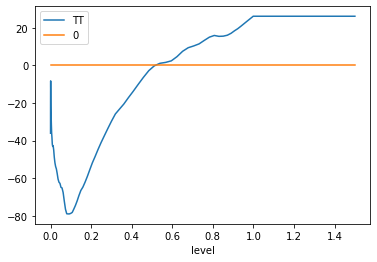

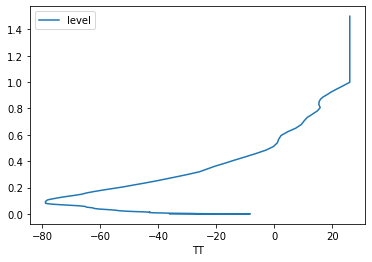

In [8]:
import dask.array as da
import fstpy.all as fstpy
import numpy as np
import pandas as pd
path = '/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std'

# Access to file with dask arrays in the column d so i can read them

df = fstpy.StandardFileReader(path, decode_metadata=True).to_pandas()

# Access  the column with numpy arrays 'd' and all the rows of the column
tt_df = df.loc[(df.nomvar=='TT') ]
ndf = tt_df.sort_values('level', ascending=False).reset_index(drop=True)
array_3d = fstpy.compute(ndf)
array_3d = np.stack(ndf.d)

column = array_3d[:,0,0]
plt_df = pd.DataFrame({'level':ndf.level,'TT':column,'0':np.zeros(column.shape)})
plt_df.set_index('level').plot()
plt_df.reset_index()
plt_df.drop('0',axis=1).set_index('TT').plot()


# Sqlite and Pandas

In [ ]:
import sqlite3
df = df.drop(['d','shape','interval'], axis=1, errors='ignore')
# connect to a test DB with one three-column table titled "Demo"
cnx = sqlite3.connect(':memory:')
df.to_sql(name='std', con=cnx)
p2 = pd.read_sql('select * from std', cnx)
p2


# Getting and manipulating the meta data

In [ ]:
import fstpy.all as fstpy
import pathlib
from datetime import datetime
import numpy as np
import pandas as pd

## Method 1 - to_pandas with explicit instance

In [ ]:
std_file = fstpy.StandardFileReader('/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std')
df = std_file.to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

## Method 2 - to_pandas without explicit instance

In [ ]:
df = fstpy.StandardFileReader('/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std').to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

# Get a dataframe from multiple standard files

In [ ]:
# get files from today
dateTimeObj = datetime.now()
timestamp = dateTimeObj.strftime("%Y%m%d")# (%H:%M:%S.%f)")
timestamp = ''.join([timestamp,'00'])

RDPS_PATH = pathlib.Path('/fs/site3/eccc/ops/cmod/prod/hubs/suites/ops/rdps_20191231/r1/gridpt.usr/prog/eta')
rdps_files = [f for f in RDPS_PATH.iterdir() if f.name.startswith(timestamp)]

# split the results
files = np.array_split(np.array(rdps_files),4)

df = fstpy.StandardFileReader(list(files[0]),decode_metadata=True).to_pandas()
cols = list(df.columns)
cols.remove('d')

# See the contents of the dataframe

## Show the last rows of the dataframe

In [ ]:
print(f'number of processed files: {len(list(files[0]))}')
df[cols].tail(10)

## Show column names of the dataframe

In [ ]:
df.columns

## Show the levels contained in the dataframe

In [ ]:
df.level

## Show the unique levels contained in the dataframe

In [ ]:
df.level.unique()

## Show a subset of columns of the dataframe

In [ ]:
df[['nomvar','typvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']]

## Show a voir like output of the dataframe

In [ ]:
fstpy.voir(df.head(10))

# Select sub-sets of data

## Select TT with query method

In [ ]:
sel_tt_df = df.query('nomvar=="TT"')
sel_tt_df.head(10)

## Select TT with loc method - more efficient

In [ ]:
sel_tt_df = df.loc[df.nomvar=="TT"]
sel_tt_df.head(10)

## Select multiple fields

In [ ]:
sel_uuvv_df = df.loc[df.nomvar.isin(["UU","VV"])]
sel_uuvv_df.head(10)

## Select multiple fields with more than one condition

In [ ]:
sel_uuvv6_df = df.loc[(df.nomvar.isin(["UU","VV"])) & (df.ip2==6)]
sel_uuvv6_df.tail(10)

## Selecting by date range

In [ ]:
# define a start and end date
start_date = datetime(dateTimeObj.year,dateTimeObj.month,dateTimeObj.day)
end_date = datetime(dateTimeObj.year,dateTimeObj.month,dateTimeObj.day+1,23)
print(f'dates between {start_date} and {end_date}')
df.loc[df.date_of_validity.between(start_date, end_date, inclusive=True)]

# Modify meta data

## Change nomvar from TT to TTI

In [ ]:
df.loc[df.nomvar=='TT','nomvar'] = 'TTI'
print(df.loc[df.nomvar=='TTI'])
# rename again
df.loc[df.nomvar=='TTI','nomvar'] = 'TT'

# Reformatting meta data for other types or structures

## Changind the column names

In [ ]:
translation = {'nomvar':'fieldName','etiket':'pdsLabel','dateo':'dateOfObservation'}
new_df = df.rename(columns=translation)
cols = list(new_df.columns)
cols.remove('d')
new_df[cols]

# Working with data

## Getting the associated data for each record in the dataframe

In [ ]:
uu_df = df.loc[(df.nomvar=="UU") & (df.surface==True)]
vv_df = df.loc[(df.nomvar=="VV") & (df.surface==True)]

uu_data_df = fstpy.compute(uu_df)

cols = ['nomvar','ni','nj','nk','dateo','ip1','ip2','ip3','d']

print(uu_data_df[cols])


# Performing simple calculations

## Wind Modulus

### Create a record to hold the result

In [ ]:
uv_df = vv_df.copy(deep=True)

### Get a fresh index starting from 0 and change the nomvar accordingly

In [ ]:
uv_df = uv_df.reset_index(drop=True)
uv_df.loc[:,'nomvar']='UV'

### Get the first rows for uu and vv

In [ ]:
uu = (uu_df.iloc[0]['d'])
vv = (vv_df.iloc[0]['d'])

### The algorithm, after this uv_df contains our result for the wind modulus in knots

In [ ]:
uv = (uu**2 + vv**2)**.5
# store the result in the dataframe
uv_df.at[0,'d'] = uv
print('UU\n',uu.compute())
print('VV\n',vv.compute())

### Visualize dask operations

In [ ]:
uv_df.iloc[0]['d'].visualize()

In [ ]:
print('UV\n',uv_df.iloc[0]['d'].compute())

In [ ]:
# internal structure of the dask array
uv_df.iloc[0]['d']

## Wind Chill

In [ ]:
tt_df = df.loc[(df.nomvar=="TT") & (df.surface==True)]

### Create a record to hold wind chill reseult and change the nomvar

In [ ]:
re_df = uv_df.copy(deep=True)
re_df['nomvar']='RE'

### The algorithm, after this re_df contains our result for the wind chill

In [ ]:
tt = (tt_df.iloc[0]['d'])
uv = (uv_df.iloc[0]['d'])

In [ ]:
# if (tt <= 0) & (uv >= 5) then
#    re = 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 )
# else
#    re = tt
re_df.at[0,'d'] = np.where( (tt <= 0) & (uv >= 5), 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 ), tt)
print('TT\n',tt.compute())

### Visualize dask operations

In [ ]:
re_df.iloc[0]['d'].visualize()

In [ ]:
print('RE\n',re_df.iloc[0]['d'].compute())

## Basic statistics for TT records

### Create a function to compute statistics

In [ ]:
def compute_basic_stats(df:pd.DataFrame) -> pd.DataFrame:
    """ compute for each row in a datarfame, min, max, mean, standard_deviation and the 2d indice of min and max

    :param df: input dataframe
    :type df: pd.DataFrame
    :return: output dataframe with extra columns
    :rtype: pd.DataFrame
    """
    df = fstpy.compute(df)
    df['min']=None
    df['max']=None
    df['mean']=None
    df['std']=None
    df['min_pos']=None
    df['max_pos']=None
    for i in df.index:
        df.at[i,'mean'] = df.loc[i,'d'].mean()
        df.at[i,'std'] = df.loc[i,'d'].std()
        df.at[i,'min'] = df.loc[i,'d'].min()
        df.at[i,'max'] = df.loc[i,'d'].max()
        # index (i,j) of min in record
        df.at[i,'min_pos'] = np.unravel_index(df.at[i,'d'].argmin(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'min_pos'] = (df.at[i,'min_pos'][0] + 1, df.at[i,'min_pos'][1]+1)
        # index (i,j) of max in record
        df.at[i,'max_pos'] = np.unravel_index(df.at[i,'d'].argmax(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'max_pos'] = (df.at[i,'max_pos'][0] + 1, df.at[i,'max_pos'][1]+1)
    return df

In [ ]:
new_df = compute_basic_stats(tt_df)
new_df

## Basic statistics for each column of 3d matrix

In [ ]:
tt3d_df = df.loc[(df.nomvar=='TT') & (df.ip2==np.sort(df.ip2.unique())[0])].reset_index(drop=True)
# sort by level and reset index
tt3d_df = tt3d_df.sort_values(by='level',ascending=tt3d_df.iloc[0]['ascending']).reset_index(drop=True)
tt3d_df

### Use an xarray for 3d operations

In [ ]:
tt_ds = fstpy.to_cmc_xarray(tt3d_df)
tt_ds

In [ ]:
tt_ds.TT

### Compute the stats for each column

In [ ]:
tt_min = tt_ds.TT.min(dim='level')
tt_max = tt_ds.TT.max(dim='level')
tt_std = tt_ds.TT.std(dim='level')
tt_mean = tt_ds.TT.mean(dim='level')

### Create containers for our results

In [ ]:
# creates a 1 row dataframe based on a model dataframe
def create_result_df(df:pd.DataFrame, nomvar:str, operation_name:str) ->  pd.DataFrame:
   res_df = pd.DataFrame([df.iloc[0].to_dict()])
   res_df['nomvar']=nomvar
   res_df['etiket']=operation_name
   return res_df

min_df = create_result_df(tt_df,'MIN','MINIMUM')
max_df = create_result_df(tt_df,'MAX','MAXIMUM')
std_df = create_result_df(tt_df,'STD','STDDEV')
mean_df = create_result_df(tt_df,'MEAN','AVERAGE')

### Assign resulting arrays to the dataframes

In [ ]:
# .at gets the row at index in a dataframe, we have 1 row dataframes in each case and our arrays are simple 2d result arrays 
min_df.at[0,'d'] = tt_min.values
max_df.at[0,'d'] = tt_max.values 
std_df.at[0,'d'] = tt_std.values 
mean_df.at[0,'d'] = tt_mean.values 

### Combine all results into a single dataframe

In [ ]:
res_df = pd.concat([min_df,max_df,std_df,mean_df],ignore_index=True)
res_df[['nomvar','etiket','d']]

# Grouping data

## Grouping data by grid, the usual case when you have multiple grids in a dataframe

In [ ]:
grid_groups = df.groupby(by=['grid'])

for grid,grid_df in grid_groups:
    print(f'grid: {grid}')
    print(grid_df[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

## Grouping data by forecast hour, the usual case when you have multiple forecast hours per grid in a dataframe

In [ ]:
forecast_hour_groups = df.loc[df.nomvar=='TT'].groupby(by=['grid','forecast_hour'])

for (grid,fhour),forecast_hour_df in forecast_hour_groups:
    print(f'grid: {grid} forecast_hour: {fhour}')
    print(forecast_hour_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

## Grouping data by level, the usual case when you have multiple levels per grid in a dataframe

In [ ]:
levels_groups = df.loc[df.nomvar=='UU'].groupby(by=['grid','level'])

for (grid,level),level_df in levels_groups:
    print(f'grid: {grid} level: {level}')
    print(level_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

# Exporting the data

## To standardfile 

In [ ]:
from os import getenv
import fstpy.all as fstpy
df = fstpy.StandardFileReader('/fs/site3/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std').to_pandas()
tt_df = df.loc[df.nomvar=='TT']
user = getenv("USER")
file = f'/tmp/{user}/TT.std'
fstpy.delete_file(file)
fstpy.StandardFileWriter(file, tt_df).to_fst()

### Check the file

In [ ]:
df = fstpy.StandardFileReader(file).to_pandas()
cols = list(df.columns)
cols.remove('d')
df[cols]

## To pickle

In [ ]:
pickle_file = f'/home/{user}/pickle_data.pkl.bz2'
fstpy.delete_file(pickle_file)
df.to_pickle(pickle_file)

### Check the file

In [ ]:
df = pd.read_pickle(pickle_file)
df

In [ ]:
df = fstpy.compute(df)
df